# Test vectorization, rasterization tools

In [1]:
import vectorization_tools, rasterization_tools
from keras.layers import Input
import numpy as np
# from scipy.io import loadmat
from matplotlib import pyplot as plt
%matplotlib inline
import ModelA
import h5py
#from config import #DATASET

from main import load_icse_data
from predictor import Predictor

img_rows, img_cols = 32, 32
img_chn = 3

2024-07-26 15:06:15.194023: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-26 15:06:15.266450: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-26 15:06:16.277994: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-07-26 15:06:18.458504: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.

SVHN Grayscale Model1 loaded
Loaded model from disk


2024-07-26 15:06:21.307914: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8906


1/1 [==============================] - 2s 2s/step
[[8.5325720e-09 2.7335960e-01 1.6350326e-03 7.8127504e-11 2.3768649e-09
  2.9041747e-09 6.2786104e-10 2.9790070e-04 8.7465713e-05 7.2461998e-01]]
(9, 0.4512604)
1/1 [==============================] - 0s 30ms/step


2024-07-26 15:06:21.693060: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


[[1.3290753e-04 2.3544727e-01 8.1434302e-02 6.6172326e-01 1.3760813e-03
  1.9793008e-03 1.7267112e-02 5.3546828e-04 4.8883692e-05 5.5405213e-05]]
(3, -0.6616678)


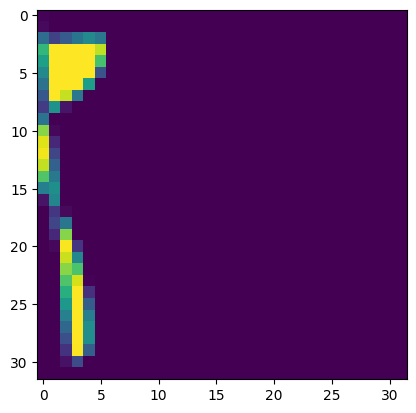

In [2]:
image_generated_temp = np.load("runs/run_1721924295/archive/mbr2160.npy")
plt.imshow(np.reshape(image_generated_temp,(img_rows, img_cols )))
print(Predictor.model.predict(image_generated_temp))
print(Predictor.predict_single(image_generated_temp , 9))


image_generated_temp2 = np.load("runs/run_1721923141/archive/mbr287.npy")
plt.imshow(np.reshape(image_generated_temp2,(img_rows, img_cols )))
print(Predictor.model.predict(image_generated_temp2))
print(Predictor.predict_single(image_generated_temp2 , 9))

In [3]:
confidence_100 = True
explabel = 0

def plot_original_and_rasterized(confidence_100, explabel):
    x_test, y_test = load_icse_data(confidence_100, explabel)
    
    fig, axs = plt.subplots(4,5)
    fig.tight_layout()
    predict_ori = Predictor.predict(x_test, y_test)
    # print(predict_ori)

    label_presevation_num = 0
    for i, img in enumerate(x_test):
        r = i//5 *2
        c = i-i//5*5
        xml_desc = vectorization_tools.vectorize(img)
        rasterized = rasterization_tools.rasterize_in_memory(xml_desc)

        label_rasterized = Predictor.predict_single(rasterized , explabel)[0]
        if label_rasterized == explabel:
            label_presevation_num += 1
        axs[r, c].imshow(np.reshape(img,(img_rows, img_cols) ))
        axs[r+1, c].imshow(np.reshape(rasterized,(img_rows, img_cols) ))
        axs[r, c].set_title(f"Original {predict_ori[0][i]}, {predict_ori[1][i]}")
        axs[r+1, c].set_title(f"rasterized {Predictor.predict_single(rasterized , explabel)[0]}")

    return label_presevation_num

label preservation rate is 0.98


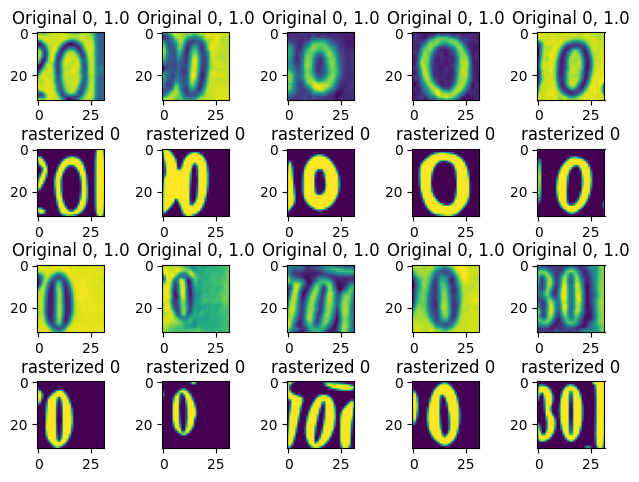

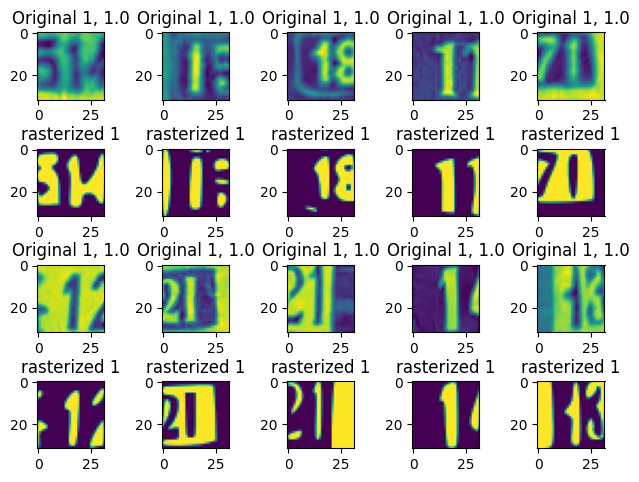

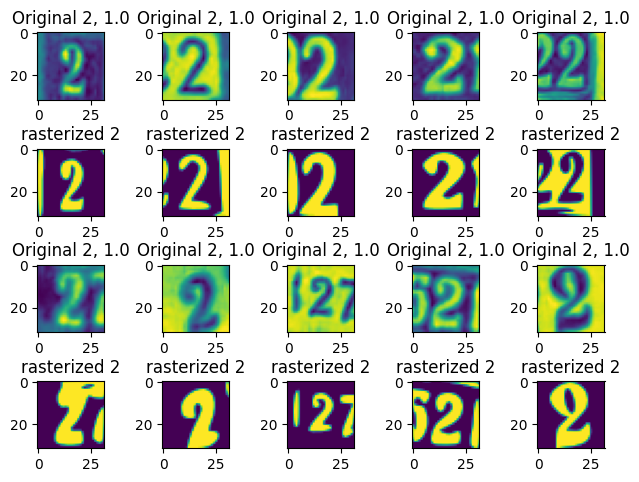

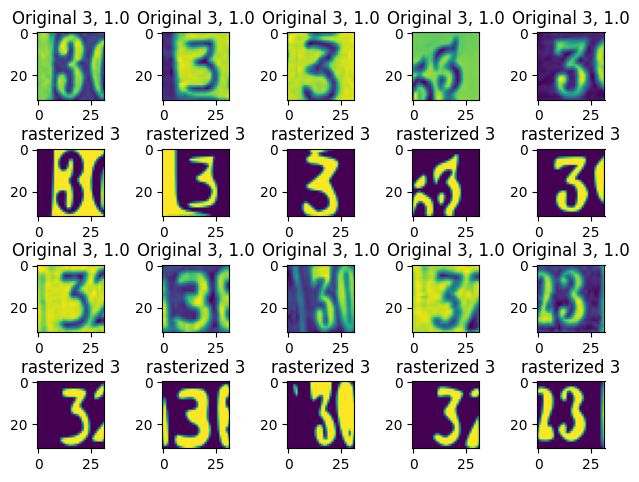

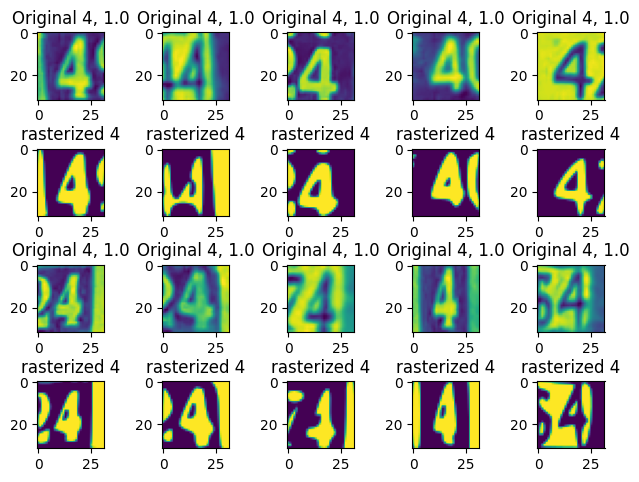

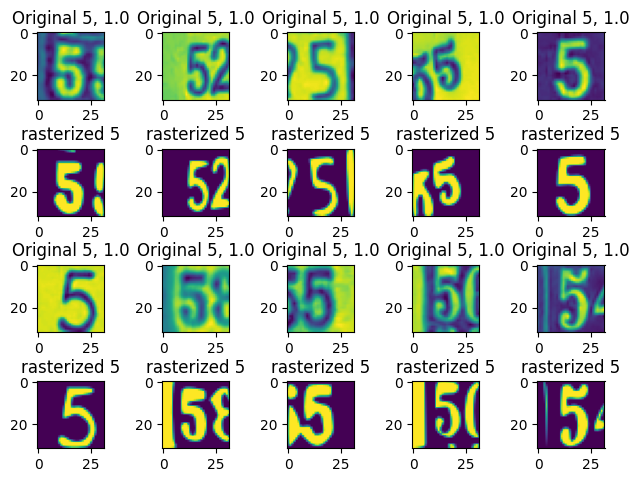

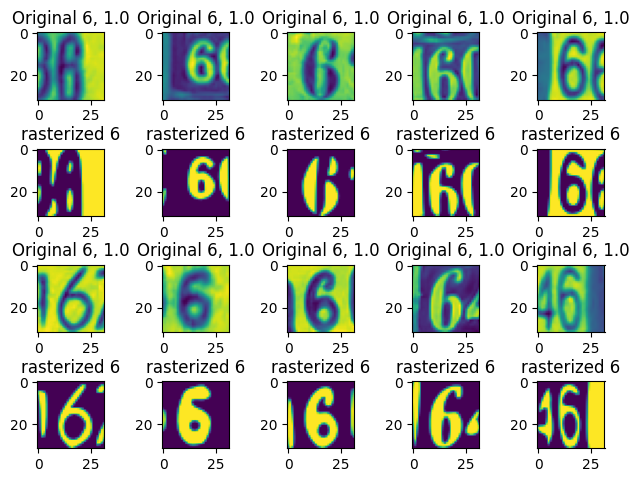

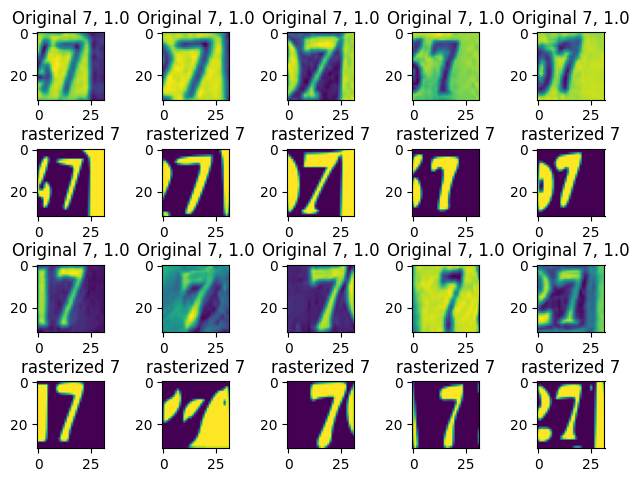

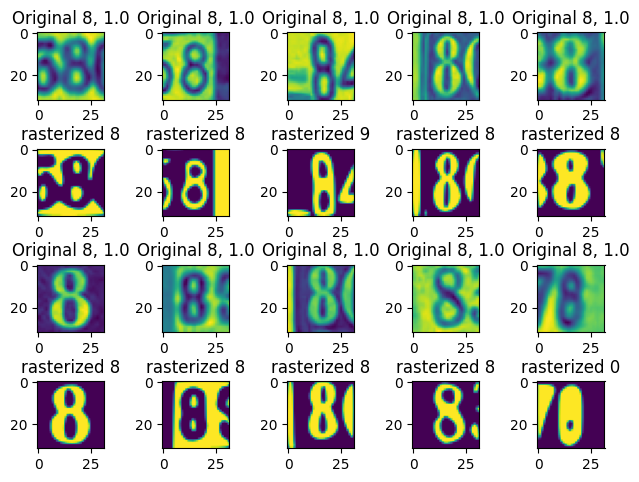

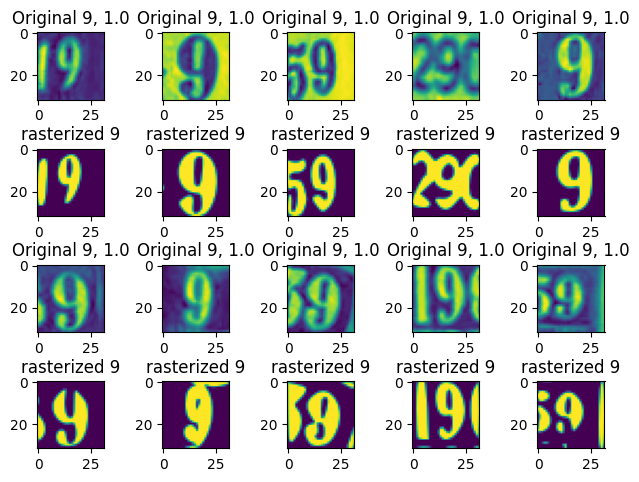

In [4]:
label_presevation_num = 0
for i in range(10):
    label_presevation_num += plot_original_and_rasterized(True, i)

print(f"label preservation rate is {label_presevation_num/100}")

label preservation rate is 0.46


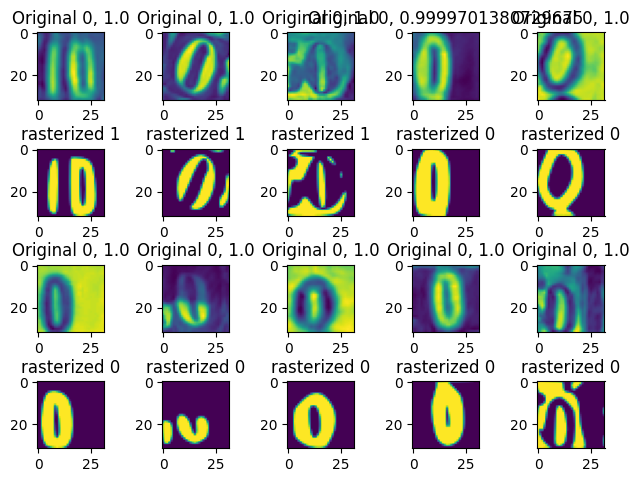

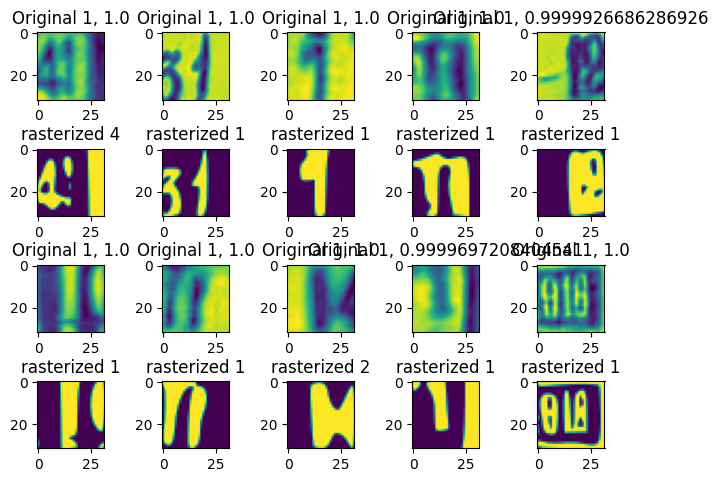

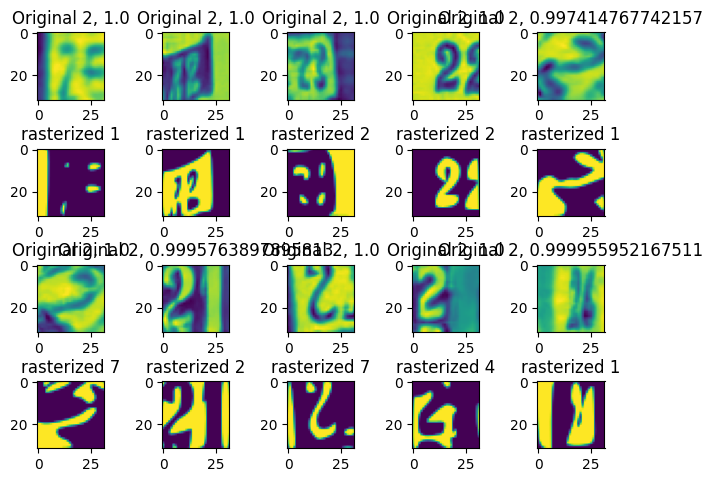

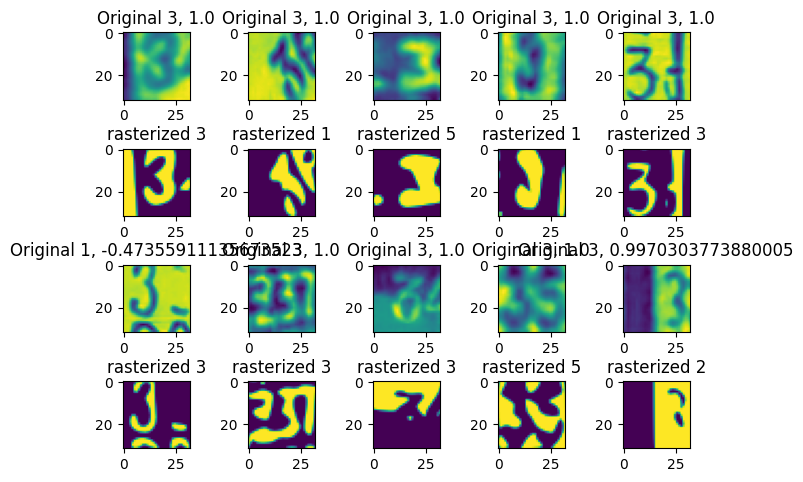

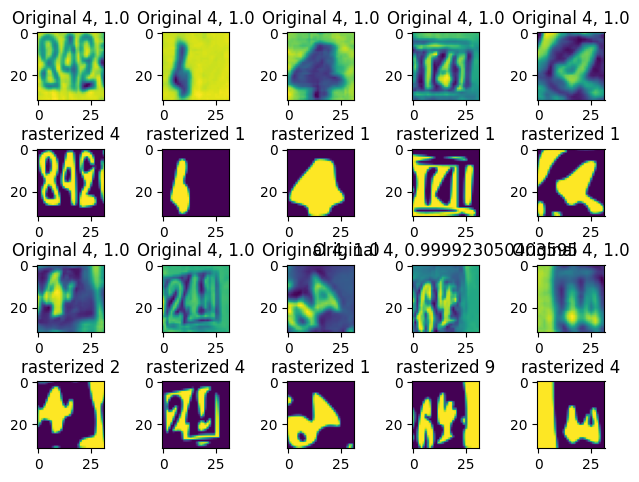

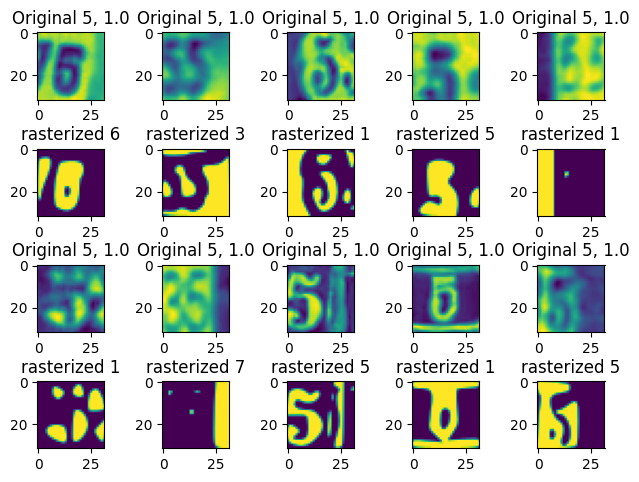

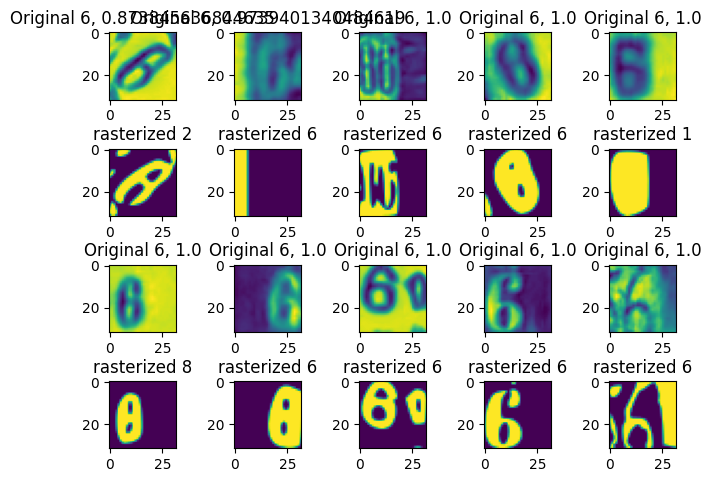

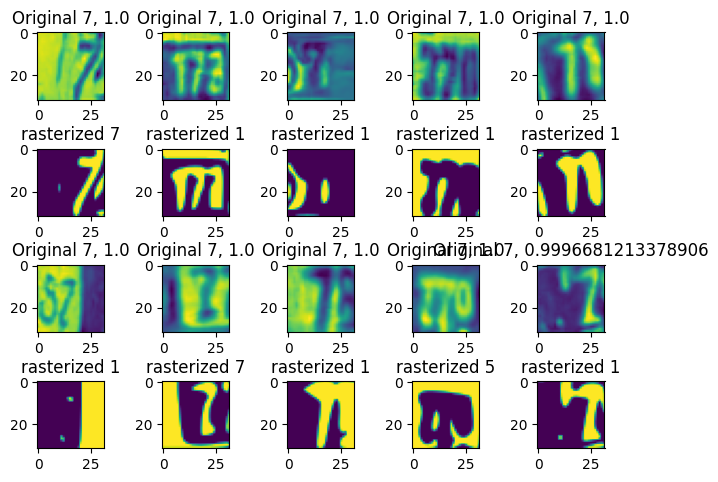

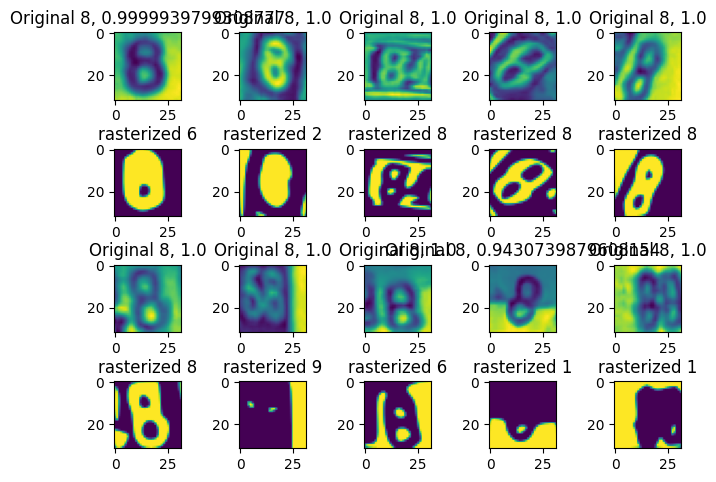

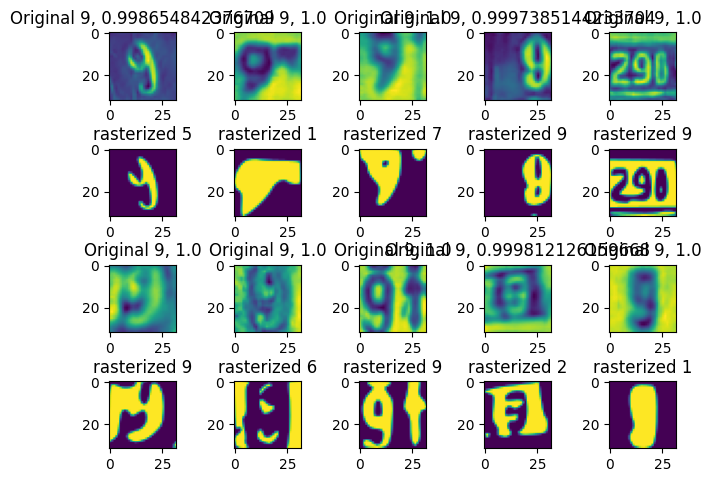

In [5]:
label_presevation_num = 0
for i in range(10):
    label_presevation_num += plot_original_and_rasterized(False, i)

print(f"label preservation rate is {label_presevation_num/100}")

In [6]:
# Load the dataset.
hf = h5py.File(DATASET, 'r')
x_test = hf.get('xn')
x_test = np.array(x_test)
y_test = hf.get('yn')
y_test = np.array(y_test)


NameError: name 'DATASET' is not defined

In [ ]:
print(x_test.shape)

In [ ]:
# Normalize data.
#x_test = np.moveaxis(x_test, -1, 0)
#x_test = x_test.astype('float32') / 255

#y_test[y_test == 10] = 0
#y_test = np.array(y_test)

# 22 is critical
index = 12
seed_image = x_test[index]
explabel = y_test[index]
#seed_image = x_test[5]
fig, axs = plt.subplots(1,4)
for channel in range(seed_image.shape[2]):
    channel_img = seed_image[...,channel]
    # plt.imsave("channel"+str(channel)+".png", channel_img, cmap='gray')
    axs[channel].imshow(channel_img)
    axs[channel].set_title(f"channel {channel}")
#plt.imsave("channel_original.png", seed_image, cmap='gray')
axs[3].imshow(seed_image)
axs[3].set_title(f"original image")
#grey = np.mean(seed_image, axis=2)
#plt.imsave("channel_mean.png", grey, cmap='gray')

In [ ]:
xml_desc = vectorization_tools.vectorize(seed_image)

with open ("channel_svg.svg", 'w') as file:
    file.write(xml_desc)

rasterized = rasterization_tools.rasterize_in_memory(xml_desc)

print(rasterized.shape)
plt.imshow(rasterized[0])

In [ ]:
color_rasterized = rasterized
print(color_rasterized.shape)

input_shape = (img_rows, img_cols, img_chn)

# define input tensor as a placeholder
input_tensor = Input(shape=input_shape)

model1 = ModelA.ModelA(input_tensor)
print(model1.name)

pred1 = model1.predict(color_rasterized)
label1 = np.argmax(pred1[0])
print("expected label: " + str(explabel))
print("predicted label: "+str(label1))


v = color_rasterized * 255.0
v = v.astype('uint8')
v = v.reshape(32, 32, 3)
# plt.imsave("channel_mean_vectorized.png", v, cmap='gray')
plt.imshow(v)
print(v.shape)